In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import subprocess

# Command to create a virtual environment
command = "python3 -m venv venv"

# Execute the command
subprocess.run(command, shell=True)


CompletedProcess(args='python3 -m venv venv', returncode=9009)

In [3]:
import subprocess

# Command to activate the virtual environment
command = "venv/bin/activate"

# Execute the command
subprocess.run(f"source {command}", shell=True)


CompletedProcess(args='source venv/bin/activate', returncode=1)

In [4]:
def load_and_preview_dataset(name, data_folder, filename, sep=','): 
    df = pd.read_csv(f'{data_folder}/{filename}', sep=sep)
    print(f'Columns and data types of "{name}" dataset')
    display(df.dtypes)
    print(f'Number of rows of "{name}" dataset', len(df))
    print(f'Head of {name} dataset')
    display(df.head())
    print("\nMissing values in orders:\n", df.isnull().sum())
    return df


In [5]:
data_folder = r"C:\Users\s_sad\Downloads\BR- BerlinRecyclingNextcoder"  
orders = load_and_preview_dataset('orders', data_folder, 'Aufträge.csv', sep=',')


C:\Users\s_sad\AppData\Local\Temp\ipykernel_23648\436457062.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{data_folder}/{filename}', sep=sep)


Columns and data types of "orders" dataset


%TOURNR                      int64
%DEBITOR%EINSATZSTELLE       int64
Auftr.Auftragsnr.           object
Auftr.Einsatzdatum          object
Auftr.Menge                 object
Auftr.Einheit               object
Auftr.Betriebsmittelnr.    float64
Auftr.Int. Stoffkatalog     object
Artikel                     object
Betriebsmittel              object
dtype: object

Number of rows of "orders" dataset 13242295
Head of orders dataset


%TOURNR  %DEBITOR%EINSATZSTELLE Auftr.Auftragsnr. Auftr.Einsatzdatum  \
0    32437                   56418        A221790082         19.05.2022   
1    32437                   56418        A221790083         19.05.2022   
2    82408                   56418        A231849217         23.05.2023   
3    46532                   56418        A213241021         21.09.2021   
4    25173                   56418        A220934859         15.03.2022   

  Auftr.Menge Auftr.Einheit  Auftr.Betriebsmittelnr. Auftr.Int. Stoffkatalog  \
0           1         Stück                  20440.0                 M760300   
1           1         Stück                  20440.0                 M760300   
2           1         Stück                  20440.0                 M760300   
3           1         Stück                  20440.0                 M760300   
4           1         Stück                  20440.0                 M760300   

       Artikel Betriebsmittel  
0  Kunststoffe  30m³ CT offen  
1  Kunststoffe  30m³ CT offen  
2  Kunststoffe  30m³ CT offen  
3  Kunststoffe  30m³ CT offen  
4  Kunststoffe  30m³ CT offen


Missing values in orders:
 %TOURNR                       0
%DEBITOR%EINSATZSTELLE        0
Auftr.Auftragsnr.             0
Auftr.Einsatzdatum            0
Auftr.Menge                   0
Auftr.Einheit                41
Auftr.Betriebsmittelnr.    5647
Auftr.Int. Stoffkatalog    5059
Artikel                    5059
Betriebsmittel             5647
dtype: int64


In [6]:
# Rename columns for orders dataset
orders = orders.rename(
   columns={
       "%TOURNR": "tour_number",
       "%DEBITOR%EINSATZSTELLE": "customer_location",
       "Auftr.Auftragsnr.": "order_number",
       "Auftr.Einsatzdatum": "service_date",
       "Auftr.Menge": "quantity",
       "Auftr.Einheit": "unit",
       "Auftr.Betriebsmittelnr.": "equipment_number",
       "Auftr.Int. Stoffkatalog": "material_category",
       "Artikel": "article",
       "Betriebsmittel": "equipment_name",
   }
)
display(orders.head())

tour_number  customer_location order_number service_date quantity   unit  \
0        32437              56418   A221790082   19.05.2022        1  Stück   
1        32437              56418   A221790083   19.05.2022        1  Stück   
2        82408              56418   A231849217   23.05.2023        1  Stück   
3        46532              56418   A213241021   21.09.2021        1  Stück   
4        25173              56418   A220934859   15.03.2022        1  Stück   

   equipment_number material_category      article equipment_name  
0           20440.0           M760300  Kunststoffe  30m³ CT offen  
1           20440.0           M760300  Kunststoffe  30m³ CT offen  
2           20440.0           M760300  Kunststoffe  30m³ CT offen  
3           20440.0           M760300  Kunststoffe  30m³ CT offen  
4           20440.0           M760300  Kunststoffe  30m³ CT offen

In [7]:
orders['quantity'] = orders['quantity'].str.replace(',', '.', regex=False)
orders['quantity'] = pd.to_numeric(orders['quantity'], errors='coerce')

### What kind of units for the quantities do we have and how many rows for each of them?

In [8]:
count_per_unit = orders['unit'].value_counts()
count_per_unit

Stück        13240713
m³               1063
STD               322
Stunde(n)         122
to                 26
Pauschal            7
Stunden             1
Name: unit, dtype: int64

## Absence Events

In [9]:
data_folder = r"C:\Users\s_sad\Downloads\BR- BerlinRecyclingNextcoder"  
absence_events = load_and_preview_dataset('absence_events', data_folder, 'Zeitposten.csv', sep=',')

Columns and data types of "absence_events" dataset


%Mitarbeiternummer     int64
Zeitkontennr. Text    object
Start                 object
Ende                  object
dtype: object

Number of rows of "absence_events" dataset 10352
Head of absence_events dataset


%Mitarbeiternummer Zeitkontennr. Text       Start        Ende
0                1307     Urlaub bezahlt  09.02.2021  09.02.2021
1                1307     Urlaub bezahlt  24.03.2021  28.03.2021
2                1307     Urlaub bezahlt  05.05.2021  09.05.2021
3                1307     Urlaub bezahlt  14.06.2021  17.06.2021
4                1307     Urlaub bezahlt  25.07.2021  28.07.2021


Missing values in orders:
 %Mitarbeiternummer    0
Zeitkontennr. Text    0
Start                 0
Ende                  0
dtype: int64


In [10]:
# Rename columns for absence_events dataset
absence_events = absence_events.rename(columns={
    '%Mitarbeiternummer': 'employee_number',
    'Zeitkontennr. Text': 'time_account_number',
    'Text': 'absence_type',
    'Start': 'start_date',
    'Ende': 'end_date'
})
display(absence_events.head())

employee_number time_account_number  start_date    end_date
0             1307      Urlaub bezahlt  09.02.2021  09.02.2021
1             1307      Urlaub bezahlt  24.03.2021  28.03.2021
2             1307      Urlaub bezahlt  05.05.2021  09.05.2021
3             1307      Urlaub bezahlt  14.06.2021  17.06.2021
4             1307      Urlaub bezahlt  25.07.2021  28.07.2021

In [11]:
# Convert start_date and end_date to datetime objects
absence_events['start_date'] = pd.to_datetime(absence_events['start_date'], format='%d.%m.%Y')
absence_events['end_date'] = pd.to_datetime(absence_events['end_date'], format='%d.%m.%Y') 

# Calculate duration by subtracting end_date from start_date
absence_events['duration'] = (absence_events['end_date'] - absence_events['start_date']).dt.days +1


In [12]:
absence_events.head()

employee_number time_account_number start_date   end_date  duration
0             1307      Urlaub bezahlt 2021-02-09 2021-02-09         1
1             1307      Urlaub bezahlt 2021-03-24 2021-03-28         5
2             1307      Urlaub bezahlt 2021-05-05 2021-05-09         5
3             1307      Urlaub bezahlt 2021-06-14 2021-06-17         4
4             1307      Urlaub bezahlt 2021-07-25 2021-07-28         4

In [13]:
import pandas as pd
import datetime

def get_season(month):
    """
    Get the season based on the month.
    
    Parameters:
        - month: Integer representing the month (1-12)
    
    Returns:
        - Season as a string
    """
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Convert start_date to datetime
absence_events['start_date'] = pd.to_datetime(absence_events['start_date'])

# Extract month from start_date
absence_events['start_month'] = absence_events['start_date'].dt.month

# Get season for each month
absence_events['season'] = absence_events['start_month'].apply(get_season)


#print(absence_events)


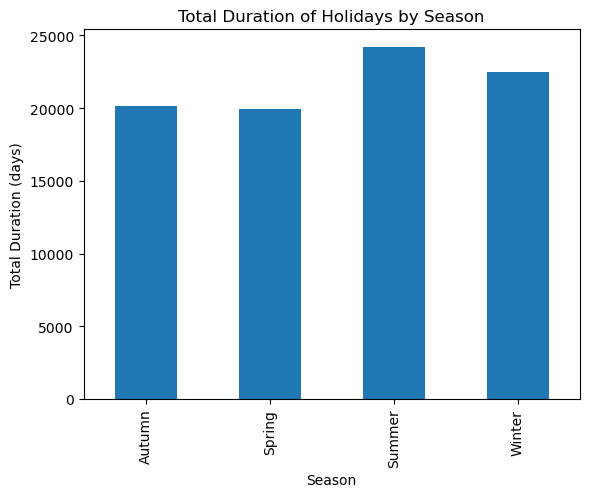

In [14]:
# Calculate the total duration of holidays for each season
season_duration = absence_events.groupby('season')['duration'].sum()

# Plot the count of holidays for each season
season_duration.plot(kind='bar')

# Set plot title and labels
plt.title('Total Duration of Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Total Duration (days)')

# Show the plot
plt.show()

In [15]:
# Calculate the total duration of holidays for each season and time_account_number
season_duration = absence_events.groupby(['season', 'time_account_number'])['duration'].sum().unstack(fill_value=0).reset_index()

# Melt the DataFrame for Plotly
season_duration_melted = pd.melt(season_duration, id_vars='season', var_name='time_account_number', value_name='duration')

# Order the data in descending order
season_duration_melted = season_duration_melted.sort_values(by=['duration'], ascending=False)

# Plot with Plotly
fig = px.bar(season_duration_melted, x='season', y='duration', color='time_account_number', barmode='stack')

# Annotate each bar with its value
for trace in fig.data:
    for i, val in enumerate(trace.y):
        fig.add_annotation(x=trace.x[i], y=val, text=str(val), showarrow=False, font=dict(size=10), yshift=5, xshift=0, align='center')

# Update layout
fig.update_layout(
    title='Total Duration of Holidays by Season and Reason',
    xaxis_title='Season',
    yaxis_title='Total Duration (days)',
    legend_title='Time Account Number',
    width=900,  # Adjust plot width
    height=600,  # Adjust plot height
)

# Show the plot
fig.show()

In [16]:
# Filter out 'Urlaub bezahlt'
filtered_events = absence_events[absence_events['time_account_number'] != 'Urlaub bezahlt']

# Calculate the total duration of holidays for each season and time_account_number
season_duration = filtered_events.groupby(['season', 'time_account_number'])['duration'].sum().unstack(fill_value=0)

# Get top 10 reasons in each season
top_10_reasons = season_duration.apply(lambda x: x.sort_values(ascending=False).head(10).index, axis=1)

# Melt the DataFrame
season_duration_melted = season_duration.reset_index().melt(id_vars='season', var_name='time_account_number', value_name='duration')

# Replace reasons not in top 10 with 'Others'
season_duration_melted['time_account_number'] = season_duration_melted.apply(lambda x: x['time_account_number'] if x['time_account_number'] in top_10_reasons.loc[x['season']] else 'Others', axis=1)

# Aggregate 'Others'
season_duration_melted = season_duration_melted.groupby(['season', 'time_account_number']).sum().reset_index()

# Order the data in descending order
season_duration_melted = season_duration_melted.sort_values(by=['season', 'duration'], ascending=[True, False])

# Plot with Plotly
fig = px.bar(season_duration_melted, x='season', y='duration', color='time_account_number', barmode='stack')

# Update layout
fig.update_layout(
    title='Total Duration of Top 10 Reasons for Holidays by Season (Excluding Urlaub bezahlt)',
    xaxis_title='Season',
    yaxis_title='Total Duration',
    legend_title='Time Account Number',
    width=900,  # Adjust plot width
    height=600,  # Adjust plot height
    xaxis={'categoryorder': 'total ascending', 'tickangle': -45}  # Rotate x-axis labels
)

# Show the plot
fig.show()

In [17]:
# Calculate the total duration of holidays for each season and time_account_number
season_duration = absence_events.groupby(['season', 'time_account_number'])['duration'].sum().unstack(fill_value=0).reset_index()

# Filter out 'Urlaub' and 'Krank (42 Tage)'
absence_events_filtered = absence_events[~absence_events['time_account_number'].isin(['Urlaub bezahlt'])]

# Calculate the total duration of holidays for each season and time_account_number after filtering
season_duration_filtered = absence_events_filtered.groupby(['season', 'time_account_number'])['duration'].sum().unstack(fill_value=0).reset_index()

# Melt the DataFrame for Plotly
season_duration_melted = pd.melt(season_duration_filtered, id_vars='season', var_name='time_account_number', value_name='duration')

# Calculate the total duration for each season
total_duration_per_season = season_duration_melted.groupby('season')['duration'].transform('sum')

# Calculate the percentage of each reason in each season
season_duration_melted['percentage'] = (season_duration_melted['duration'] / total_duration_per_season) * 100

# Order the data in descending order
season_duration_melted = season_duration_melted.sort_values(by=['season', 'percentage'], ascending=[True, False])

# Create a new category "Others" for reasons less than 5%
others_threshold = 5
season_duration_melted.loc[season_duration_melted['percentage'] < others_threshold, 'time_account_number'] = 'Others'

# Aggregate percentages for "Others" category
others_df = season_duration_melted[season_duration_melted['time_account_number'] == 'Others']
others_sum = others_df.groupby('season')['percentage'].sum().reset_index()
others_sum['time_account_number'] = 'Others'

# Filter out rows with percentages greater than or equal to 5%
season_duration_melted = season_duration_melted[season_duration_melted['percentage'] >= others_threshold]

# Append "Others" category
season_duration_melted = pd.concat([season_duration_melted, others_sum], ignore_index=True)

# Plot with Plotly
fig = px.bar(season_duration_melted, x='season', y='percentage', color='time_account_number', barmode='stack')

# Calculate the cumulative sum of percentages for each season
cumulative_percentage = season_duration_melted.groupby('season')['percentage'].cumsum() - season_duration_melted['percentage']

# Annotate each bar with its percentage
for i, val in enumerate(season_duration_melted['percentage']):
    fig.add_annotation(x=season_duration_melted.loc[i, 'season'], 
                       y=cumulative_percentage[i] + val / 2, 
                       text=f"{val:.1f}%", 
                       showarrow=False, 
                       font=dict(size=10), 
                       yshift=5, 
                       xshift=0, 
                       align='center')

# Update layout
fig.update_layout(
    title='Percentage of Holidays by Season and Reason',
    xaxis_title='Season',
    yaxis_title='Percentage of Total Duration (%)',
    legend_title='Time Account Number',
    width=900,  # Adjust plot width
    height=600,  # Adjust plot height
    xaxis={'categoryorder': 'total descending', 'tickangle': -45}  # Rotate x-axis labels
)

# Show the plot
fig.show()

In [18]:
absence_events.to_csv('~/Downloads/absence_events.csv', index=False)

## Locations

In [19]:
data_folder = r"C:\Users\s_sad\Downloads\BR- BerlinRecyclingNextcoder"  
locations = load_and_preview_dataset('locations', data_folder, 'Einsatzstelle.csv')

Columns and data types of "locations" dataset


%DEBITOR%EINSATZSTELLE     int64
Adresse                   object
Ort                       object
PLZ                        int64
%EINSATZSTELLENR           int64
Location                  object
dtype: object

Number of rows of "locations" dataset 138785
Head of locations dataset


%DEBITOR%EINSATZSTELLE               Adresse     Ort    PLZ  \
0                   33610           Ringstr. 8A  Berlin  12203   
1                  121533  Stahnsdorfer Damm 12  Berlin  14109   
2                  135160      Anhaltinerstr. 7  Berlin  14163   
3                  137834      Ilsensteinweg 4A  Berlin  14129   
4                  118088          Claszeile 75  Berlin  14165   

   %EINSATZSTELLENR                 Location  
0                 1  [13.3086847,52.4368641]  
1                 2  [13.1747222,52.4154794]  
2                 3  [13.2567496,52.4308445]  
3                 4    [13.22047,52.4367907]  
4                 5  [13.2596225,52.4173589]


Missing values in orders:
 %DEBITOR%EINSATZSTELLE    0
Adresse                   0
Ort                       2
PLZ                       0
%EINSATZSTELLENR          0
Location                  2
dtype: int64


In [20]:
# Rename columns for locations dataset
locations = locations.rename(columns={
    '%DEBITOR': 'customer_number',
    '%DEBITOR%EINSATZSTELLE': 'location_number',
    'Adresse': 'address',
    'Ort': 'city',
    'PLZ': 'zip_code',
    '%EINSATZSTELLENR': 'location_id',
    'Location': 'coordinates'
})
display(locations.head())

location_number               address    city  zip_code  location_id  \
0            33610           Ringstr. 8A  Berlin     12203            1   
1           121533  Stahnsdorfer Damm 12  Berlin     14109            2   
2           135160      Anhaltinerstr. 7  Berlin     14163            3   
3           137834      Ilsensteinweg 4A  Berlin     14129            4   
4           118088          Claszeile 75  Berlin     14165            5   

               coordinates  
0  [13.3086847,52.4368641]  
1  [13.1747222,52.4154794]  
2  [13.2567496,52.4308445]  
3    [13.22047,52.4367907]  
4  [13.2596225,52.4173589]

## Tours

In [21]:
tours = load_and_preview_dataset('tours', data_folder, 'Tour.csv')

Columns and data types of "tours" dataset


%TOURNR            int64
Einsatzdatum      object
Betriebsstätte    object
%Rahmentour        int64
Rahmentourcode    object
dtype: object

Number of rows of "tours" dataset 138953
Head of tours dataset


%TOURNR Einsatzdatum Betriebsstätte  %Rahmentour Rahmentourcode
0    12964   10.11.2023           MONU            1        TP00335
1    38897   07.02.2022           MONU            1        TP00335
2    73190   21.10.2022           MONU            1        TP00335
3    54020   06.08.2021           MONU            1        TP00335
4    78256   27.01.2023           MONU            1        TP00335


Missing values in orders:
 %TOURNR           0
Einsatzdatum      0
Betriebsstätte    1
%Rahmentour       0
Rahmentourcode    0
dtype: int64


In [22]:
# Rename columns for tours dataset
tours = tours.rename(columns={
    '%TOURNR': 'tour_number',
    'Einsatzdatum': 'service_date',
    'Betriebsstätte': 'operational_site',
    '%Rahmentour': 'reference_tour_number',
    'Rahmentourcode': 'reference_tour_code'
})
display(tours.head())

tour_number service_date operational_site  reference_tour_number  \
0        12964   10.11.2023             MONU                      1   
1        38897   07.02.2022             MONU                      1   
2        73190   21.10.2022             MONU                      1   
3        54020   06.08.2021             MONU                      1   
4        78256   27.01.2023             MONU                      1   

  reference_tour_code  
0             TP00335  
1             TP00335  
2             TP00335  
3             TP00335  
4             TP00335

## Claims

In [23]:
claims = load_and_preview_dataset('claims', data_folder, 'Reklamationen.csv')

Columns and data types of "claims" dataset


C:\Users\s_sad\AppData\Local\Temp\ipykernel_23648\436457062.py:2: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



%TOURNR                                 int64
Belegnr.                               object
Reklamationsgrund                       int64
Grund                                  object
Reklamationsuntergrund Beschreibung    object
dtype: object

Number of rows of "claims" dataset 790425
Head of claims dataset


%TOURNR    Belegnr.  Reklamationsgrund                 Grund  \
0   160016  A241067066                402  BB Deckel beschädigt   
1   122761  A240871203                501  Ü Ladestelle beräumt   
2    97644  A240929593                501  Ü Ladestelle beräumt   
3   121874  A240803399                501  Ü Ladestelle beräumt   
4   122263  A240977660                501  Ü Ladestelle beräumt   

  Reklamationsuntergrund Beschreibung  
0         großer Deckel - Hauptdeckel  
1        Mehrmengen mitgenommen (MMM)  
2        Mehrmengen mitgenommen (MMM)  
3        Mehrmengen mitgenommen (MMM)  
4        Mehrmengen mitgenommen (MMM)


Missing values in orders:
 %TOURNR                                     0
Belegnr.                                    0
Reklamationsgrund                           0
Grund                                      24
Reklamationsuntergrund Beschreibung    557898
dtype: int64


In [24]:
# Rename columns for claims dataset
claims = claims.rename(columns={
    '%TOURNR': 'tour_number',
    'Belegnr.': 'claim_number',
    'Reklamationsgrund': 'complaint_reason',
    'Reklamationstyp': 'complaint_type',
    'Grund': 'complaint_ground',
    'Reklamationsuntergrund Beschreibung': 'complaint_description'
})
display(claims.head())

tour_number claim_number  complaint_reason      complaint_ground  \
0       160016   A241067066               402  BB Deckel beschädigt   
1       122761   A240871203               501  Ü Ladestelle beräumt   
2        97644   A240929593               501  Ü Ladestelle beräumt   
3       121874   A240803399               501  Ü Ladestelle beräumt   
4       122263   A240977660               501  Ü Ladestelle beräumt   

          complaint_description  
0   großer Deckel - Hauptdeckel  
1  Mehrmengen mitgenommen (MMM)  
2  Mehrmengen mitgenommen (MMM)  
3  Mehrmengen mitgenommen (MMM)  
4  Mehrmengen mitgenommen (MMM)

In [25]:
resources = load_and_preview_dataset('resources', data_folder, 'Ressource.csv')

Columns and data types of "resources" dataset


%TOURNR                    int64
%Mitarbeiternummer         int64
Zeitarbeiter_Flag          int64
Ressource.Erster Fahrer    int64
dtype: object

Number of rows of "resources" dataset 344277
Head of resources dataset


%TOURNR  %Mitarbeiternummer  Zeitarbeiter_Flag  Ressource.Erster Fahrer
0    95350                   1                  0                        1
1    95350                   2                  0                        0
2    95351                   3                  1                        0
3    95351                   4                  0                        1
4    95351                   5                  0                        0


Missing values in orders:
 %TOURNR                    0
%Mitarbeiternummer         0
Zeitarbeiter_Flag          0
Ressource.Erster Fahrer    0
dtype: int64


In [26]:
# Rename columns for ressources dataset
resources = resources.rename(columns={
    '%TOURNR': 'tour_number',
    '%Mitarbeiternummer': 'employee_number',
    'Zeitarbeiter_Flag': 'temporary_worker_flag',
    'Ressource.Erster Fahrer': 'primary_driver'
})
display(resources.head())

tour_number  employee_number  temporary_worker_flag  primary_driver
0        95350                1                      0               1
1        95350                2                      0               0
2        95351                3                      1               0
3        95351                4                      0               1
4        95351                5                      0               0

In [27]:
tour_time = load_and_preview_dataset('Tour_times', data_folder, 'Tour_times.csv')

Columns and data types of "Tour_times" dataset


%TOURNR           int64
Einsatzdatum     object
Startuhrzeit     object
Endeuhrzeit      object
Ausgangspunkt    object
dtype: object

Number of rows of "Tour_times" dataset 95349
Head of Tour_times dataset


%TOURNR Einsatzdatum Startuhrzeit Endeuhrzeit Ausgangspunkt
0    50486   02.01.2021     00:00:00    00:00:00           NaN
1    50509   02.01.2021     00:00:00    00:00:00           NaN
2    50534   02.01.2021     00:00:00    00:00:00           NaN
3    50289   02.01.2021     05:52:55    10:34:48           NaN
4    23203   02.01.2021     05:08:08    12:14:50           NaN


Missing values in orders:
 %TOURNR              0
Einsatzdatum         0
Startuhrzeit         0
Endeuhrzeit          0
Ausgangspunkt    44717
dtype: int64


In [28]:
# Rename columns for ressources dataset
tour_time = tour_time.rename(columns={
    '%TOURNR': 'tour_number',
    'Einsatzdatum': 'date',
    'Startuhrzeit': 'start_time',
    'Endeuhrzeit': 'end_time',
    'Ausgangspunkt': 'starting_point'
})
display(tour_time.head())

tour_number        date start_time  end_time starting_point
0        50486  02.01.2021   00:00:00  00:00:00            NaN
1        50509  02.01.2021   00:00:00  00:00:00            NaN
2        50534  02.01.2021   00:00:00  00:00:00            NaN
3        50289  02.01.2021   05:52:55  10:34:48            NaN
4        23203  02.01.2021   05:08:08  12:14:50            NaN

In [29]:
import pandas as pd

# Assuming you have DataFrames named absence_events, claims, and resources

# Merge resources with absence_events to get the employee numbers
merged_data = pd.merge(resources, claims, on='tour_number')

# Merge the merged_data with claims to get the required dates
final_data = pd.merge(merged_data, absence_events, on='employee_number')

# Select the required columns
required_data = final_data[['employee_number', 'start_date', 'end_date', 'duration','complaint_ground','season']]

# Now you have a DataFrame containing the required dates
#print(required_data.head())


In [55]:
required_data.to_csv("~/Downloads/eng_berlin/required_data.csv", index=False)

C:\Users\s_sad\AppData\Local\Temp\ipykernel_23648\2591042348.py:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



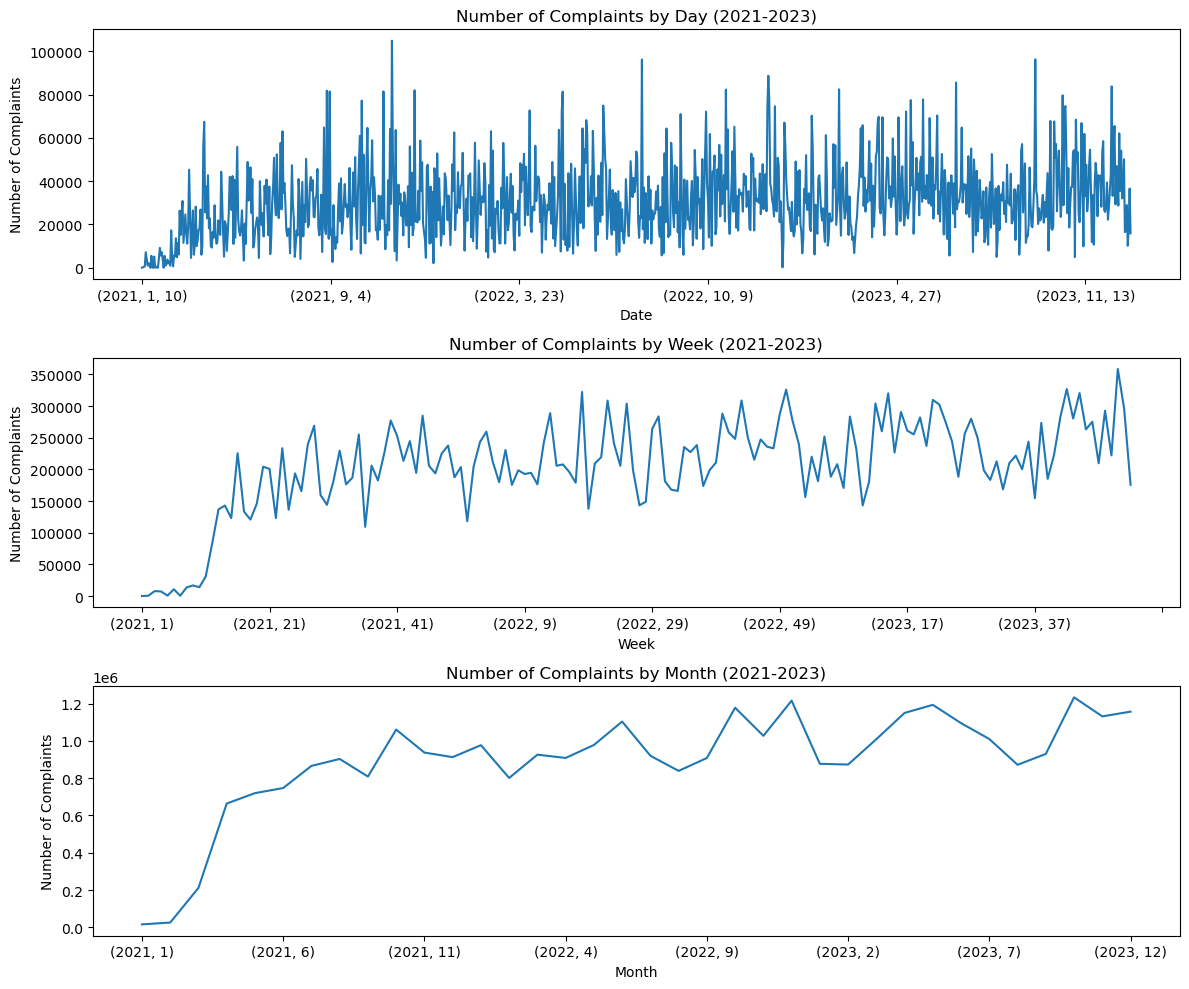

In [30]:
import matplotlib.pyplot as plt

# Filter data for the years 2021 to 2023
filtered_data = required_data[required_data['start_date'].dt.year.isin([2021, 2022, 2023])]

# Count complaints by day, week, and month
complaints_by_day = filtered_data.groupby([filtered_data['start_date'].dt.year,
                                           filtered_data['start_date'].dt.month,
                                           filtered_data['start_date'].dt.day]).size()
complaints_by_week = filtered_data.groupby([filtered_data['start_date'].dt.year,
                                            filtered_data['start_date'].dt.week]).size()
complaints_by_month = filtered_data.groupby([filtered_data['start_date'].dt.year,
                                             filtered_data['start_date'].dt.month]).size()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Complaints by day
complaints_by_day.plot(ax=axes[0])
axes[0].set_title('Number of Complaints by Day (2021-2023)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Complaints')

# Complaints by week
complaints_by_week.plot(ax=axes[1])
axes[1].set_title('Number of Complaints by Week (2021-2023)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Number of Complaints')

# Complaints by month
complaints_by_month.plot(ax=axes[2])
axes[2].set_title('Number of Complaints by Month (2021-2023)')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Complaints')

plt.tight_layout()
plt.show()


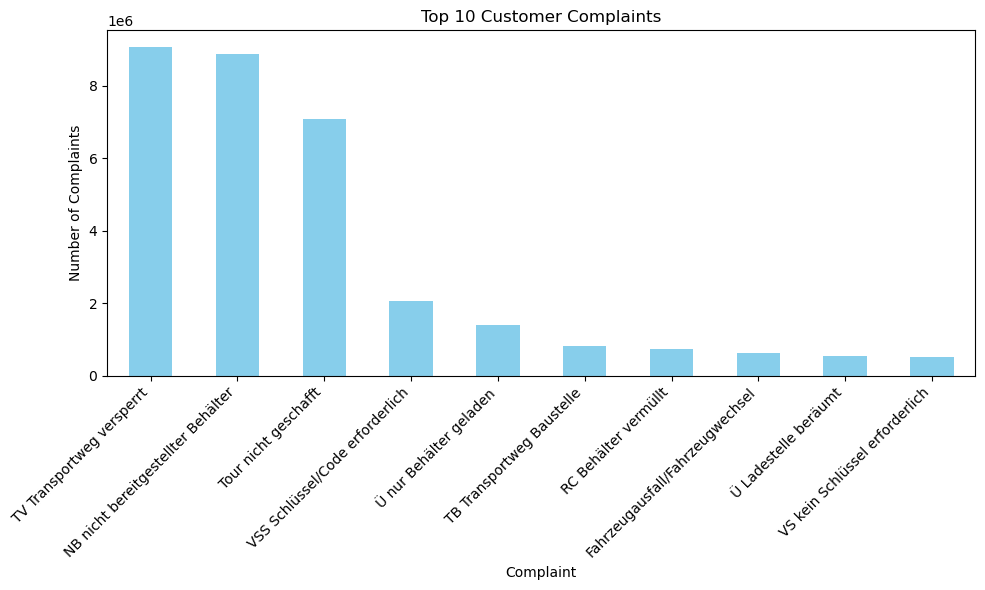

In [31]:
import matplotlib.pyplot as plt

# Get the top 10 complaints
top_10_complaints = required_data['complaint_ground'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_complaints.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customer Complaints')
plt.xlabel('Complaint')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\s_sad\AppData\Local\Temp\ipykernel_23648\3765299260.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



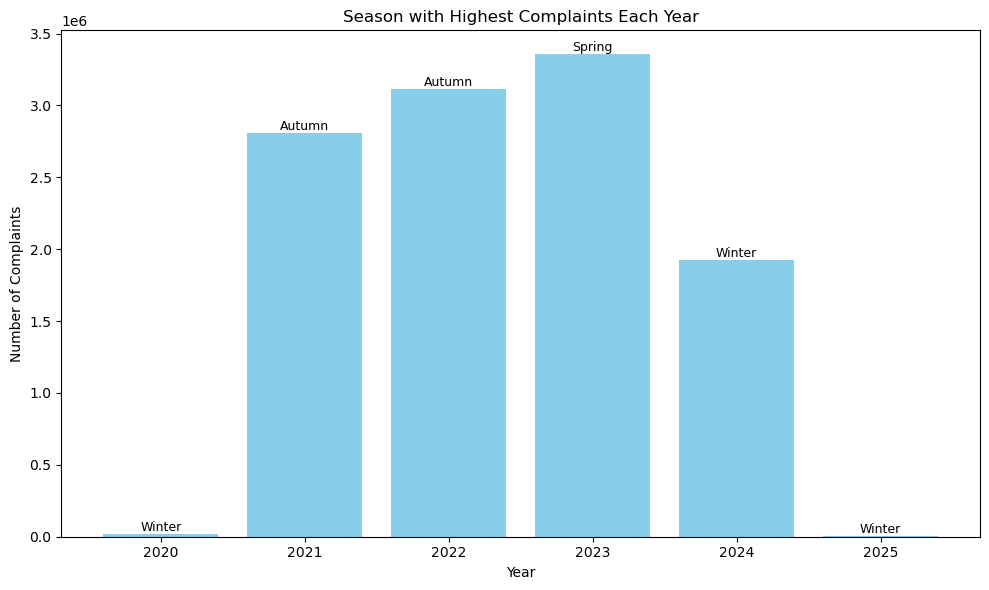

In [32]:
import matplotlib.pyplot as plt

# Extract year from start date
required_data['year'] = required_data['start_date'].dt.year

# Group data by year and season, and count complaints
complaints_by_year_season = required_data.groupby(['year', 'season']).size().reset_index(name='complaint_count')

# Find the season with the highest number of complaints for each year
max_complaint_season = complaints_by_year_season.loc[complaints_by_year_season.groupby('year')['complaint_count'].idxmax()]

# Plotting
plt.figure(figsize=(10, 6))
for year, season, count in max_complaint_season[['year', 'season', 'complaint_count']].values:
    plt.text(year, count, season, ha='center', va='bottom', fontsize=9)
plt.bar(max_complaint_season['year'], max_complaint_season['complaint_count'], color='skyblue')
plt.title('Season with Highest Complaints Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(max_complaint_season['year'])
plt.tight_layout()
plt.show()


In [33]:
order_tour = pd.merge(orders, tours, on='tour_number', how='outer')

In [34]:
order_tour_resources = pd.merge(order_tour, resources, on = 'tour_number', how = 'outer')

## Data in English

In [35]:
orders.to_csv("~/Downloads/eng_berlin/orders.csv", index=False)

In [36]:
absence_events.to_csv('~/Downloads/eng_berlin/absence_events.csv', index=False)

In [37]:
claims.to_csv("~/Downloads/eng_berlin/claims.csv", index=False)

In [38]:
resources.to_csv("~/Downloads/eng_berlin/resources.csv", index=False)

In [39]:
tours.to_csv("~/Downloads/eng_berlin/tours.csv", index=False)

In [40]:
locations.to_csv("~/Downloads/eng_berlin/locations.csv", index=False)

In [41]:
tour_time.to_csv("~/Downloads/eng_berlin/tour_time.csv", index=False)

## Kaggle Data 

In [42]:
statisfication = pd.read_csv(r"C:\Users\s_sad\Downloads\eng_berlin\employee_satisfication_kaggle\archive (5)\Employee Attrition.csv")

In [43]:
statisfication

Emp ID  satisfaction_level  last_evaluation  number_project  \
0          1.0                0.38             0.53             2.0   
1          2.0                0.80             0.86             5.0   
2          3.0                0.11             0.88             7.0   
3          4.0                0.72             0.87             5.0   
4          5.0                0.37             0.52             2.0   
...        ...                 ...              ...             ...   
15782  14995.0                0.40             0.57             2.0   
15783  14996.0                0.37             0.48             2.0   
15784  14997.0                0.37             0.53             2.0   
15785  14998.0                0.11             0.96             6.0   
15786  14999.0                0.37             0.52             2.0   

       average_montly_hours  time_spend_company  Work_accident  \
0                     157.0                 3.0            0.0   
1                     262.0                 6.0            0.0   
2                     272.0                 4.0            0.0   
3                     223.0                 5.0            0.0   
4                     159.0                 3.0            0.0   
...                     ...                 ...            ...   
15782                 151.0                 3.0            0.0   
15783                 160.0                 3.0            0.0   
15784                 143.0                 3.0            0.0   
15785                 280.0                 4.0            0.0   
15786                 158.0                 3.0            0.0   

       promotion_last_5years     dept  salary  
0                        0.0    sales     low  
1                        0.0    sales  medium  
2                        0.0    sales  medium  
3                        0.0    sales     low  
4                        0.0    sales     low  
...                      ...      ...     ...  
15782                    0.0  support     low  
15783                    0.0  support     low  
15784                    0.0  support     low  
15785                    0.0  support     low  
15786                    0.0  support     low  

[15787 rows x 10 columns]

In [44]:
data_folder = r"C:\Users\s_sad\Downloads\eng_berlin\employee_satisfication_kaggle\archive (5)"
satisfication = load_and_preview_dataset('satisfication', data_folder, 'Employee Attrition.csv', sep=',')

Columns and data types of "satisfication" dataset


Emp ID                   float64
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
promotion_last_5years    float64
dept                      object
salary                    object
dtype: object

Number of rows of "satisfication" dataset 15787
Head of satisfication dataset


Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years   dept  salary  
0                    0.0  sales     low  
1                    0.0  sales  medium  
2                    0.0  sales  medium  
3                    0.0  sales     low  
4                    0.0  sales     low


Missing values in orders:
 Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64


In [45]:
satisfication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


df.describe() The function is used to describe the statistics of the dataset. It mainly shows the total count, mean, median and mode of each columns in the dataset.

In [46]:
satisfication.describe().T

count         mean          std    min      25%  \
Emp ID                 14999.0  7500.000000  4329.982679   1.00  3750.50   
satisfaction_level     14999.0     0.612834     0.248631   0.09     0.44   
last_evaluation        14999.0     0.716102     0.171169   0.36     0.56   
number_project         14999.0     3.803054     1.232592   2.00     3.00   
average_montly_hours   14999.0   201.050337    49.943099  96.00   156.00   
time_spend_company     14999.0     3.498233     1.460136   2.00     3.00   
Work_accident          14999.0     0.144610     0.351719   0.00     0.00   
promotion_last_5years  14999.0     0.021268     0.144281   0.00     0.00   

                           50%       75%      max  
Emp ID                 7500.00  11249.50  14999.0  
satisfaction_level        0.64      0.82      1.0  
last_evaluation           0.72      0.87      1.0  
number_project            4.00      5.00      7.0  
average_montly_hours    200.00    245.00    310.0  
time_spend_company        3.00      4.00     10.0  
Work_accident             0.00      0.00      1.0  
promotion_last_5years     0.00      0.00      1.0

**Satisfication Level: ***Interpreting these statistics, we can see that the majority of employees fall within a range between 0.44 and 0.82 in terms of reported satisfaction. The average satisfaction level is around 0.613, indicating that, on average, employees tend to report moderate to high levels of satisfaction. However, there's variation, as seen from the standard deviation, with some employees reporting lower levels of satisfaction (down to 0.09) and others reporting very high levels (up to 1.0).

**Number of Projects:
***On an average an employee gets about 3.8 Projects to work on with a std. deviatin of 1.2. Number of projects might have strong dependence on statisification level since this reveals work distribution.

**Last Evaluation: 
***can be understood as the performance score of employees, indicating their productivity. On average, employees have a performance score of 0.71. Looking at the quartile measures, we find that only 25% of employees have a performance score above 0.82, while half of them have a score above 0.72 and half below 0.72. The least productive 25% of employees have a performance score of 0.56.

**Time spend in company: 
***On an average an employee stay for upto 3 years in a company. The maximum an employee spent in a company is for 10 years. More than 75% of employees stay in a company for less than 4 years. At a minimum they stay for 2 years

## Data Cleaning

In [47]:
#finding the missing values 
missing_values = satisfication[satisfication.isna().any(axis=1)]
display(missing_values.head())
display(missing_values.isna().count())

Emp ID  satisfaction_level  last_evaluation  number_project  \
12783     NaN                 NaN              NaN             NaN   
12784     NaN                 NaN              NaN             NaN   
12785     NaN                 NaN              NaN             NaN   
12786     NaN                 NaN              NaN             NaN   
12787     NaN                 NaN              NaN             NaN   

       average_montly_hours  time_spend_company  Work_accident  \
12783                   NaN                 NaN            NaN   
12784                   NaN                 NaN            NaN   
12785                   NaN                 NaN            NaN   
12786                   NaN                 NaN            NaN   
12787                   NaN                 NaN            NaN   

       promotion_last_5years dept salary  
12783                    NaN  NaN    NaN  
12784                    NaN  NaN    NaN  
12785                    NaN  NaN    NaN  
12786                    NaN  NaN    NaN  
12787                    NaN  NaN    NaN

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [48]:
## 788 entries have no data, so its best to drop them. 
satisfication.dropna(inplace = True)

In [49]:
satisfication.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


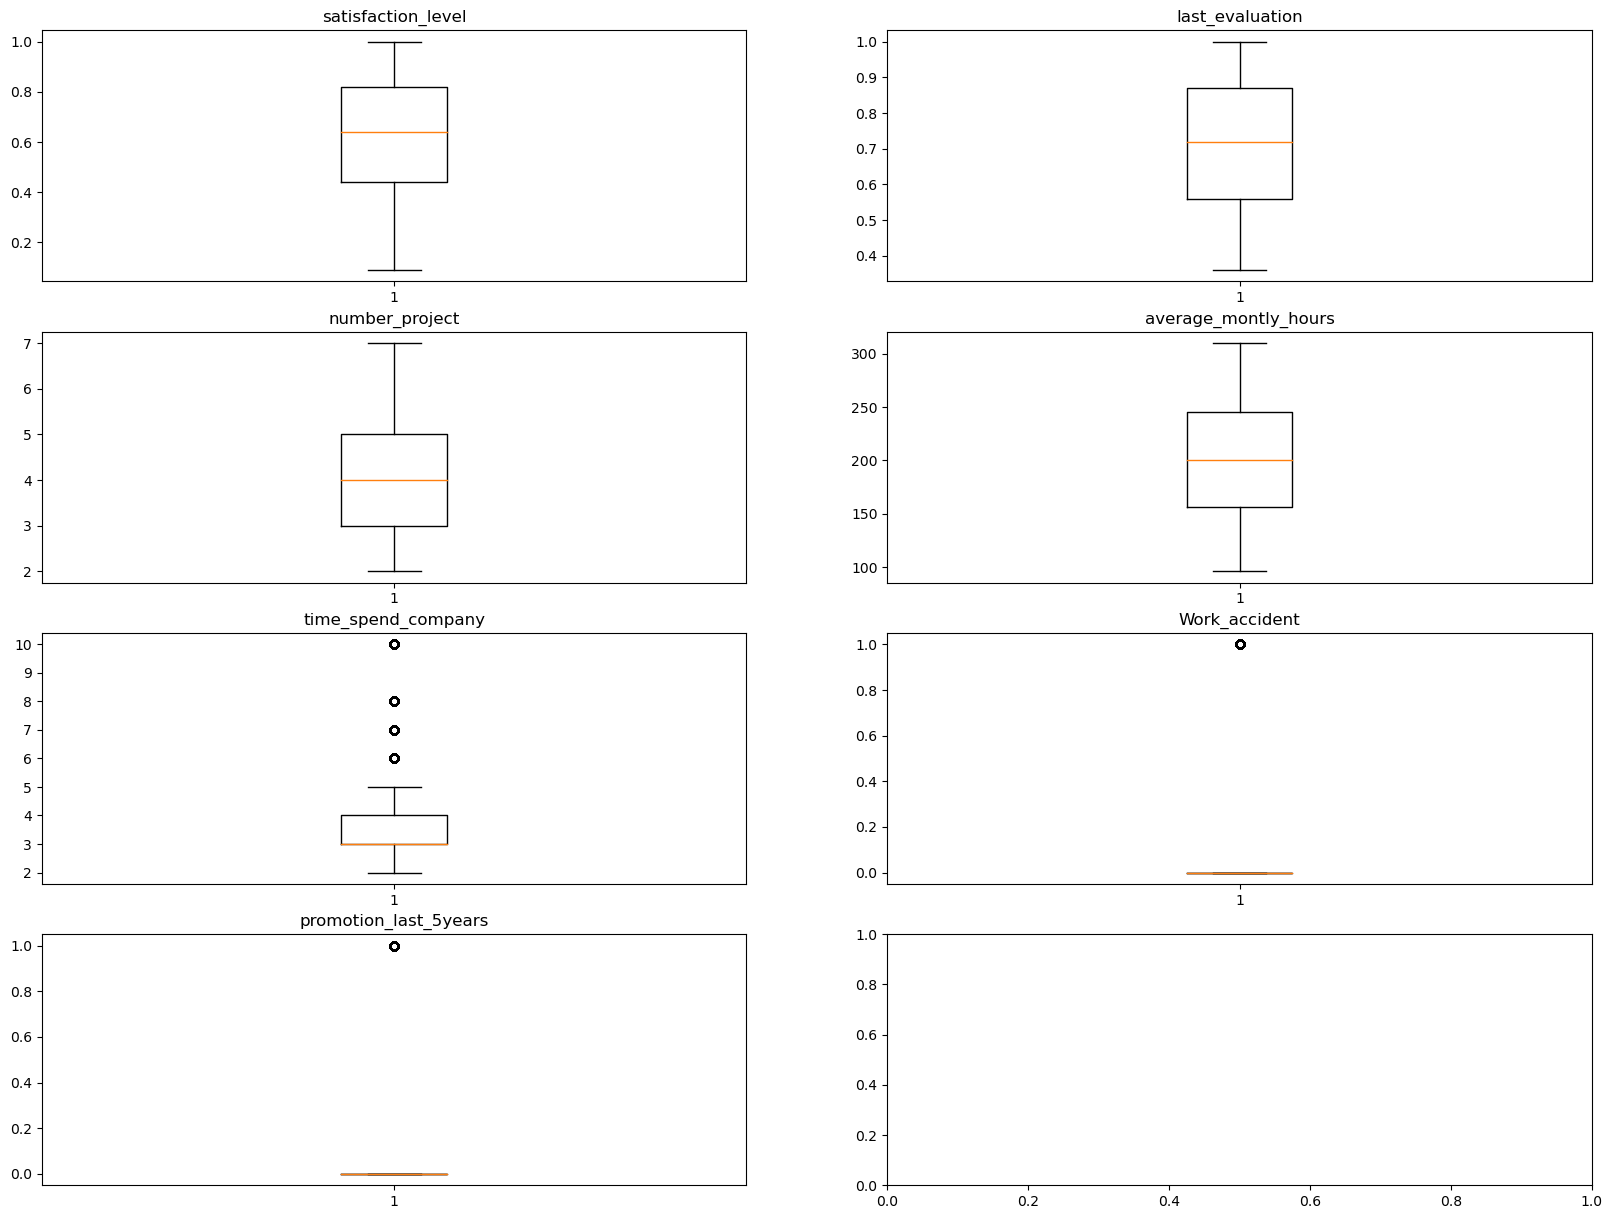

In [50]:
##checking outliers in numerical data
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,2, figsize=(20,15))

axs[0, 0].boxplot(satisfication['satisfaction_level'])
axs[0, 1].boxplot(satisfication['last_evaluation'])
axs[1, 0].boxplot(satisfication['number_project'])
axs[1, 1].boxplot(satisfication['average_montly_hours'])
axs[2, 0].boxplot(satisfication['time_spend_company'])
axs[2, 1].boxplot(satisfication['Work_accident'])
axs[3, 0].boxplot(satisfication['promotion_last_5years'])
#axs[3, 1].boxplot(satisfication['dept'])

axs[0, 0].title.set_text('satisfaction_level')
axs[0, 1].title.set_text('last_evaluation')
axs[1, 0].title.set_text('number_project')
axs[1, 1].title.set_text('average_montly_hours')
axs[2, 0].title.set_text('time_spend_company')
axs[2, 1].title.set_text('Work_accident')
axs[3, 0].title.set_text('promotion_last_5years')
#axs[3, 1].title.set_text('dept')
plt.show()

Most of the data does not have outliers except time_spend_company but for the moment we will not remove any outliers.

In [51]:
correlation = satisfication.corr() # pearson correlation
#mask = correlation > 0
#correlation[mask]
correlation

Emp ID  satisfaction_level  last_evaluation  \
Emp ID                 1.000000            0.045841        -0.018168   
satisfaction_level     0.045841            1.000000         0.105021   
last_evaluation       -0.018168            0.105021         1.000000   
number_project        -0.012124           -0.142970         0.349333   
average_montly_hours  -0.009850           -0.020048         0.339742   
time_spend_company     0.144159           -0.100866         0.131591   
Work_accident          0.015931            0.058697        -0.007104   
promotion_last_5years  0.088994            0.025605        -0.008684   

                       number_project  average_montly_hours  \
Emp ID                      -0.012124             -0.009850   
satisfaction_level          -0.142970             -0.020048   
last_evaluation              0.349333              0.339742   
number_project               1.000000              0.417211   
average_montly_hours         0.417211              1.000000   
time_spend_company           0.196786              0.127755   
Work_accident               -0.004741             -0.010143   
promotion_last_5years       -0.006064             -0.003544   

                       time_spend_company  Work_accident  \
Emp ID                           0.144159       0.015931   
satisfaction_level              -0.100866       0.058697   
last_evaluation                  0.131591      -0.007104   
number_project                   0.196786      -0.004741   
average_montly_hours             0.127755      -0.010143   
time_spend_company               1.000000       0.002120   
Work_accident                    0.002120       1.000000   
promotion_last_5years            0.067433       0.039245   

                       promotion_last_5years  
Emp ID                              0.088994  
satisfaction_level                  0.025605  
last_evaluation                    -0.008684  
number_project                     -0.006064  
average_montly_hours               -0.003544  
time_spend_company                  0.067433  
Work_accident                       0.039245  
promotion_last_5years               1.000000

Satisfication level is not highly correlated with any of the variables. However it has negative relationship with number or projects, average monthly hours and time spent in company and weakly positively related with last evaluation, work accident and promotion last 5 years. 

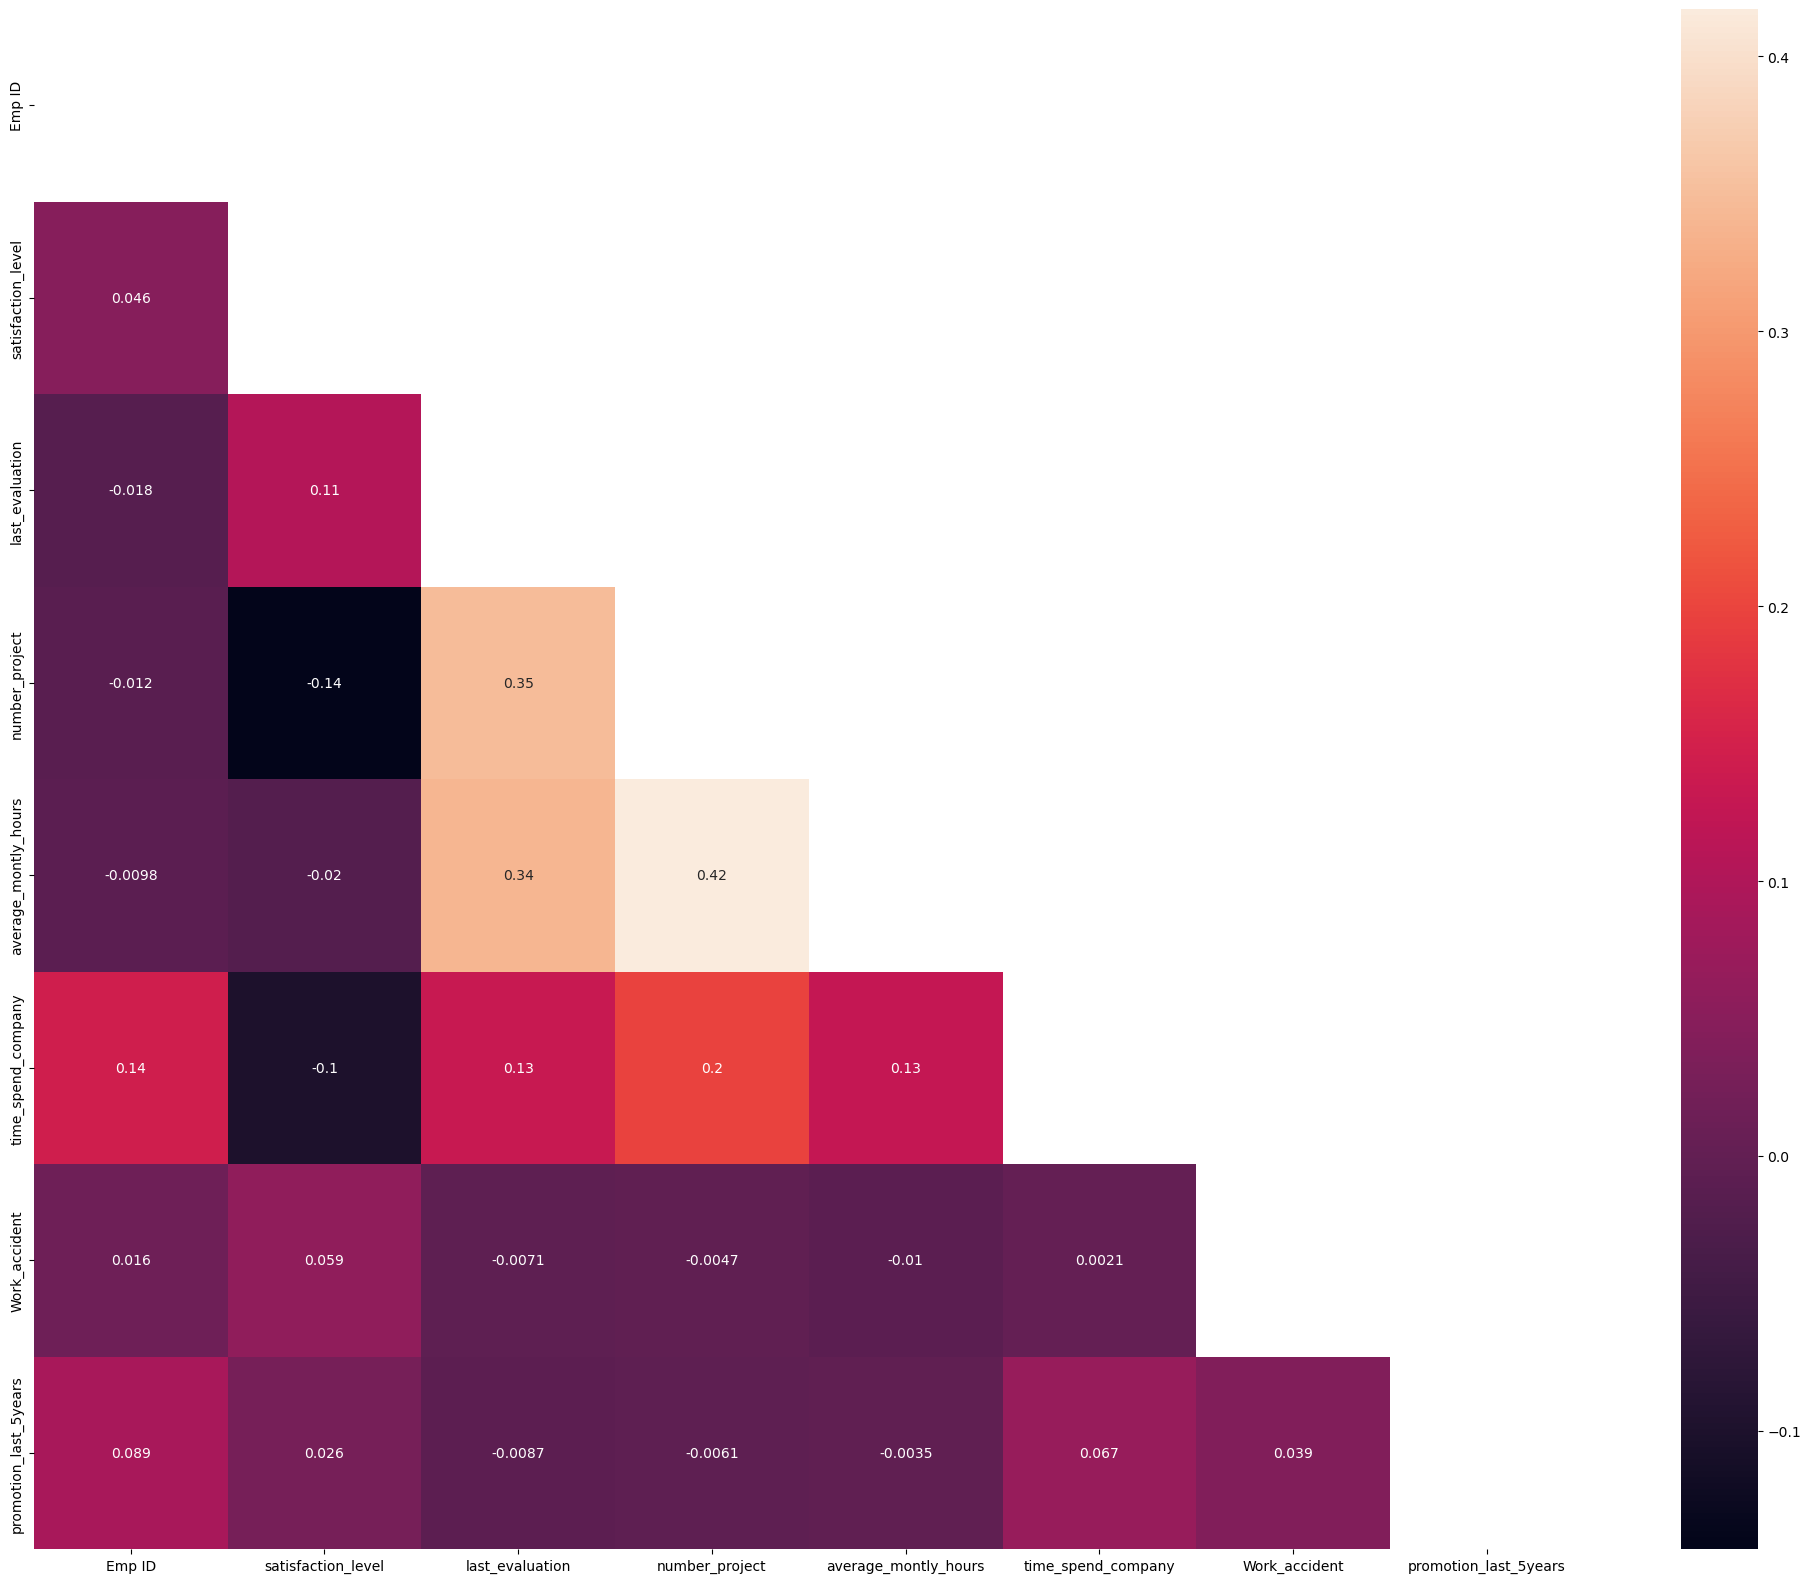

In [52]:
#heatmap
import seaborn as sns
mask = np.zeros_like(correlation)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(correlation, mask=mask, cbar = True, annot=True)
plt.show()

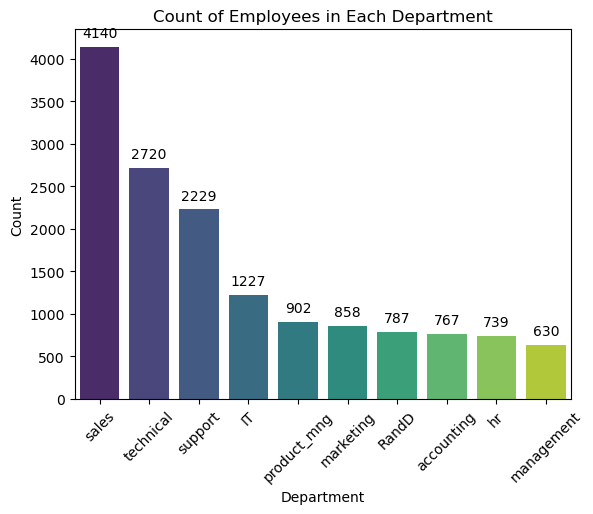

In [53]:
# Count the occurrences of each department
department_counts = satisfication['dept'].value_counts()

# Order the departments by count in descending order
ordered_departments = department_counts.index


ax1 = sns.countplot(x='dept', data=satisfication, order=ordered_departments, palette='viridis')

# Set plot title and labels
ax1.set_title('Count of Employees in Each Department')
ax1.set_xlabel('Department')
ax1.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Add count labels to the bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

# Show the plot
plt.show()

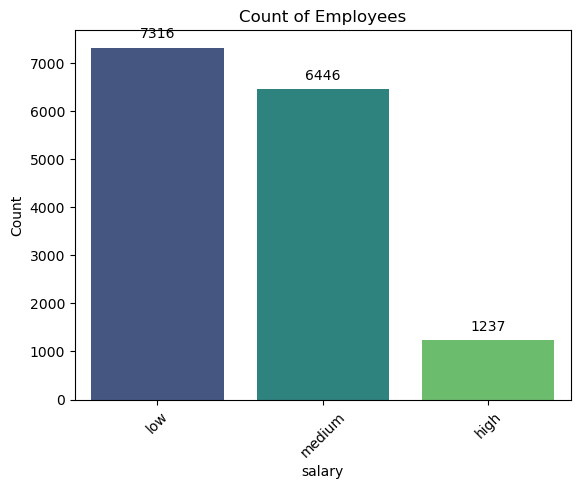

In [54]:
# Count the occurrences of each department
department_counts = satisfication['salary'].value_counts()

# Order the departments by count in descending order
ordered_departments = department_counts.index


ax1 = sns.countplot(x='salary', data=satisfication, order=ordered_departments, palette='viridis')

# Set plot title and labels
ax1.set_title('Count of Employees')
ax1.set_xlabel('salary')
ax1.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Add count labels to the bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

# Show the plot
plt.show()